   cluster species
0        1  setosa
1        1  setosa
2        1  setosa
3        1  setosa
4        1  setosa

Tabela Cruzada (Cluster vs Espécie Real):
species  setosa  versicolor  virginica
cluster                               
0             0           3         36
1            50           0          0
2             0          47         14

Inércia com k=3: 78.8556658259773


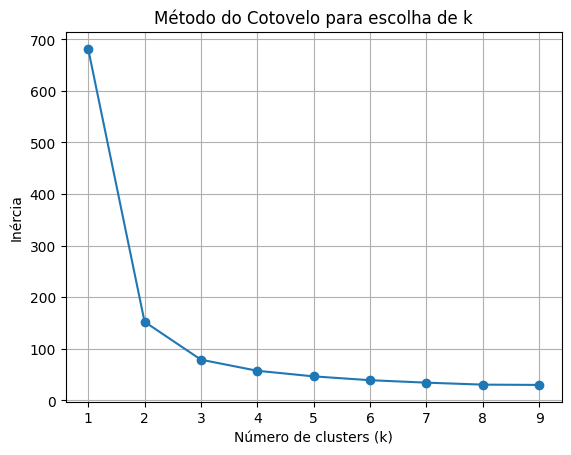

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Carregar dataset Iris
data = load_iris()
samples = data.data
true_species = data.target_names[data.target]  # ["setosa", "setosa", "versicolor", ...]

# Criar e ajustar modelo KMeans com 3 clusters
model = KMeans(n_clusters=3, random_state=42)
cluster_labels = model.fit_predict(samples)

# Criar DataFrame com os rótulos dos clusters e as espécies reais
df = pd.DataFrame({
    'cluster': cluster_labels,
    'species': true_species
})

# Exibir o DataFrame
print(df.head())

# Criar tabela cruzada (crosstab)
ct = pd.crosstab(df['cluster'], df['species'])
print("\nTabela Cruzada (Cluster vs Espécie Real):")
print(ct)

# Exibir a inércia do modelo com 3 clusters
print("\nInércia com k=3:", model.inertia_)

# Gerar gráfico do método do cotovelo para diferentes valores de k
inertias = []
k_values = range(1, 10)

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(samples)
    inertias.append(model.inertia_)

# Plotar gráfico
plt.plot(k_values, inertias, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inércia")
plt.title("Método do Cotovelo para escolha de k")
plt.grid(True)
plt.show()
